# BRAIN TUMOR MULTI CLASS CLASSIFICATION PROBLEM 

#### Now let us print an image from one of the classes of the training data set 

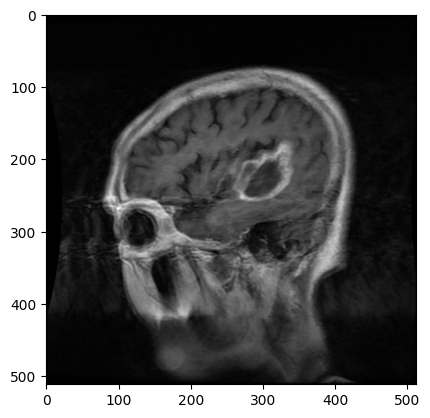

In [9]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
image=imread('C:\\IIT B\\Brain Tumor CNN\\Data\\Training\\glioma\\Tr-gl_0024.jpg')
plt.imshow(image)

In [17]:
image.shape
# it is an RGB image so the values are going to vary between 0 to 255 , where (0,0,0) reprsents black and (255,255,255) represents white

(512, 512, 3)

#### This is the image which we have printed 

# Data Augmentation

## TRAINING DATA

In [28]:
# Here i will doing data augmentation to 
''' 1-increase the number of images in my data
    2-to solve the problem of overfitting 
    3-to balance the imbalanced data set '''

' 1-increase the number of images in my data\n    2-to solve the problem of overfitting \n    3-to balance the imbalanced data set '

In [29]:
# Let us firstly figure out the number of images belonging to each category in the training data set 
import os

# Define the path to your training data directory
training_data_path = 'extracted_CNN\\Data\\Training'

# List all subdirectories (classes)
subfolders = [f.path for f in os.scandir(training_data_path) if f.is_dir()]

# Image file extensions to consider
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')

# Dictionary to hold the count of images in each subfolder
image_counts = {}

# Iterate over each subfolder and count images
for subfolder in subfolders:
    file_list = os.listdir(subfolder)
    image_files = [file for file in file_list if file.lower().endswith(image_extensions)]
    image_counts[os.path.basename(subfolder)] = len(image_files)

# Print the count of images in each subfolder
for subfolder, count in image_counts.items():
    print(f'{subfolder}: {count} images')

# Print the total number of images
total_images = sum(image_counts.values())
print(f'Total number of images in the training dataset: {total_images}')


glioma: 1321 images
meningioma: 1339 images
notumor: 1595 images
pituitary: 1457 images
Total number of images in the training dataset: 5712


In [30]:
# Let us firstly figure out the number of images belonging to each category in the testing data set 
import os

# Define the path to your training data directory
training_data_path = 'extracted_CNN\\Data\\Testing'

# List all subdirectories (classes)
subfolders = [f.path for f in os.scandir(training_data_path) if f.is_dir()]

# Image file extensions to consider
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')

# Dictionary to hold the count of images in each subfolder
image_counts = {}

# Iterate over each subfolder and count images
for subfolder in subfolders:
    file_list = os.listdir(subfolder)
    image_files = [file for file in file_list if file.lower().endswith(image_extensions)]
    image_counts[os.path.basename(subfolder)] = len(image_files)

# Print the count of images in each subfolder
for subfolder, count in image_counts.items():
    print(f'{subfolder}: {count} images')

# Print the total number of images
total_images = sum(image_counts.values())
print(f'Total number of images in the testing dataset: {total_images}')


glioma: 300 images
meningioma: 306 images
notumor: 405 images
pituitary: 300 images
Total number of images in the testing dataset: 1311


#### Let us over sample the training data set and let us have 2k images belonging to each of the categories

In [2]:
import numpy as np
import os
import tensorflow 
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator # This is the class which we use for data augmentation

In [5]:
train_datagen=ImageDataGenerator(rotation_range=30,
                                rescale=1/255, # The data set has RGB images so this is will scale the values between 0 and 1 
                                shear_range=0.2, # We are providing a range not a fixed value
                                horizontal_flip=True,
                                vertical_flip=True,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                fill_mode='nearest')
# Here we have defined various parameters on the basis of which new images will be generated 

In [46]:
 
# Base directory for saving augmented images 
save_base_dir=r'C:\IIT B\Brain Tumor CNN\Augmented Data\Training'

glioma_generator=train_datagen.flow_from_directory(r'C:\IIT B\Brain Tumor CNN\Data\Training',
                                                  target_size=(150,150), # we are resizing the image as well
                                                  batch_size=1, # from each image 1 new image will be generated
                                                  class_mode='categorical',
                                                  classes=['glioma'],
                                                  save_to_dir=os.path.join(save_base_dir,'glioma'),# save the augmented images to the 'glioma' subdir
                                                  save_prefix='glioma') # the image genrated will have the prefix 'glioma '



# Iterate through the generator 
for i in range(0,2000): # I want 2k images in glioma 
    glioma_images,glioma_labels=next(glioma_generator)

Found 1321 images belonging to 1 classes.


In [9]:
save_base_dir=r'C:\IIT B\Brain Tumor CNN\Augmented Data\Training'

meningioma_generator=train_datagen.flow_from_directory(r'C:\IIT B\Brain Tumor CNN\Data\Training',
                                                  target_size=(150,150),
                                                  batch_size=1, # from each image 1 new image will be generated
                                                  class_mode='categorical',
                                                  classes=['meningioma'],
                                                  save_to_dir=os.path.join(save_base_dir,'meningioma'),# save the augmented images to the 'glioma' subdir
                                                  save_prefix='meningioma') # the image genrated will have the prefix 'glioma '


notumor_generator=train_datagen.flow_from_directory(r'C:\IIT B\Brain Tumor CNN\Data\Training',
                                                  target_size=(150,150),
                                                  batch_size=1, # from each image 1 new image will be generated
                                                  class_mode='categorical',
                                                  classes=['notumor'],
                                                  save_to_dir=os.path.join(save_base_dir,'notumor'),# save the augmented images to the 'glioma' subdir
                                                  save_prefix='notumor') # the image genrated will have the prefix 'glioma '

pituitary_generator=train_datagen.flow_from_directory(r'C:\IIT B\Brain Tumor CNN\Data\Training',
                                                  target_size=(150,150),
                                                  batch_size=1, # from each image 1 new image will be generated
                                                  class_mode='categorical',
                                                  classes=['pituitary'],
                                                  save_to_dir=os.path.join(save_base_dir,'pituitary'),# save the augmented images to the 'glioma' subdir
                                                  save_prefix='pituitary') # the image genrated will have the prefix 'glioma '



# Iterate through the generator 
for i in range(0,2000): # I want 2k images in glioma 
    pituitary_images,pituitary_labels=next(pituitary_generator)
    meningioma_images,meningioma_labels=next(meningioma_generator)
    notumor_images,notumor_labels=next(notumor_generator)

Found 1339 images belonging to 1 classes.
Found 1595 images belonging to 1 classes.
Found 1457 images belonging to 1 classes.


### So finally we have 2000 of each categry in the training data set using data augmentation, now we have more images to train our CNN architecture on , we have balanced categories solving the problem of bias, we are also looking after the problem of overfitting 

### This completes the data augmentation part , also do note the fact that the new images generated using ImageDataGenerator has been rescaled 1/255 so we will also have to rescale the testing images 

## TESTING DATA 

In [ ]:
''' I am applying data augmentation on the testing data because of the following reasons 
    1-To rescale the images, since i rescaled the training images i also need to rescale the testing images 
    2-To balance out categories , imbalanced testing data also effects the reliability of metrics 
    3-More testing data to accurately evaluate the working of the model '''

### Well i have decided to augument the testing data just to rescale it 

In [3]:
test_datagen=ImageDataGenerator(rescale=1/255)

In [5]:
save_base_dir=r'C:\IIT B\Brain Tumor CNN\Augmented Data\Testing'
glioma_generator=test_datagen.flow_from_directory(r'C:\IIT B\Brain Tumor CNN\Data\Testing',
                                                  target_size=(150,150), # we are resizing the image as well
                                                  batch_size=1, # from each image 1 new image will be generated
                                                  class_mode='categorical',
                                                  classes=['glioma'],
                                                  save_to_dir=os.path.join(save_base_dir,'glioma'),# save the augmented images to the 'glioma' subdir
                                                  save_prefix='glioma') # the image genrated will have the prefix 'glioma '


# since we are not adding additional pictures in the training data we will run the loop = number of images of this category in the training data set 
for i in range(0,300): # I want 2k images in glioma 
    glioma_images,glioma_labels=next(glioma_generator)

Found 300 images belonging to 1 classes.


In [6]:
meningioma_generator=test_datagen.flow_from_directory(r'C:\IIT B\Brain Tumor CNN\Data\Testing',
                                                  target_size=(150,150), # we are resizing the image as well
                                                  batch_size=1, # from each image 1 new image will be generated
                                                  class_mode='categorical',
                                                  classes=['meningioma'],
                                                  save_to_dir=os.path.join(save_base_dir,'meningioma'),# save the augmented images to the 'glioma' subdir
                                                  save_prefix='meningioma') # the image genrated will have the prefix 'glioma '


# since we are not adding additional pictures in the training data we will run the loop = number of images of this category in the training data set 
for i in range(0,306): 
    meningioma_images,meningioma_labels=next(meningioma_generator)

Found 306 images belonging to 1 classes.


In [7]:
notumor_generator=test_datagen.flow_from_directory(r'C:\IIT B\Brain Tumor CNN\Data\Testing',
                                                  target_size=(150,150), # we are resizing the image as well
                                                  batch_size=1, # from each image 1 new image will be generated
                                                  class_mode='categorical',
                                                  classes=['notumor'],
                                                  save_to_dir=os.path.join(save_base_dir,'notumor'),
                                                  save_prefix='notumor') 

# since we are not adding additional pictures in the training data we will run the loop = number of images of this category in the training data set 
for i in range(0,405): 
    notumor_images,notumor_labels=next(notumor_generator)

Found 405 images belonging to 1 classes.


In [8]:
pituitary_generator=test_datagen.flow_from_directory(r'C:\IIT B\Brain Tumor CNN\Data\Testing',
                                                  target_size=(150,150), # we are resizing the image as well
                                                  batch_size=1, # from each image 1 new image will be generated
                                                  class_mode='categorical',
                                                  classes=['pituitary'],
                                                  save_to_dir=os.path.join(save_base_dir,'pituitary'),
                                                  save_prefix='pituitary') 

# since we are not adding additional pictures in the training data we will run the loop = number of images of this category in the training data set 
for i in range(0,300): 
    pituitary_images,pituitary_labels=next(pituitary_generator)

Found 300 images belonging to 1 classes.


## As i mentioned previously i have sclaed and resized the images , scaled 1/255 i.e pixel entries will be between 0 and 1 also the image will be of the size 150*150

In [17]:
image=imread('C:\\IIT B\\Brain Tumor CNN\\Augmented Data\\Testing\\pituitary\\pituitary_0_148601.png')
image

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

#### we can see that 0 and 1 values are there , now since it is a black and white RGB image ,so the pixels are either going to be 0 or 255 and post scaling they are either 0 or 1 , 0 representing black and 1 representing white 

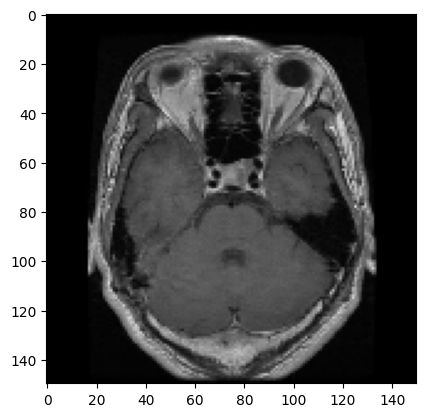

In [18]:
plt.imshow(image)

In [19]:
image.shape
# this image is rescaled 

(150, 150, 3)

# The data augmentation part is over now 